# Prática de IA: Treinamento de modelo

## Descrição da Base de Dados -- Doença Cardíaca

Prever se um paciente possui ou não doença cardíaca com base em variáveis clínicas e demográficas.
O objetivo nessa prática é apresentar o workflow básico pra criação de um modelo inteligente para solucionar um problema de classificação. Desta forma, vamos realizar, passo a passo, as quatro principais etapas do processo: Extração de atributos, Divisão dos dados, Treinamento do modelo e Avaliação do modelo.

In [1]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [1]:
# Carregar e entender os dados

# biblioteca para carregar e realizar operações tabulares
import pandas as pd

# biblioteca para plotar gráficos
import matplotlib.pyplot as plt 


# dataset, arquivo com os dados sobre a covid19 nas cisdades do BR
arquivo  = 'heart.csv'

# carregando o conteúdo do arquivo em um objeto pandas.DataFrame
# a partir do método de carregamento de arquivo read_excel
# o parâmetro header=0 indica que a primeira linha do arquivo contém os nomes das col
# especificando que a primeira linha contém os nomes do cabeçalho
dataset = pd.read_csv(arquivo, header=0)


# exibindo a dimensão dos dados carregados (linhas, colunas)
dataset.shape

(918, 12)

In [3]:
# exibindo as 10 primeiras linhas de valores contidos no dataset
dataset.head(10)
# exibindo os 10 últimas linhas de valores do dataset
#dataset.tail(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
# para acesssar uma linha aleatória
dataset.iloc[23] #linha especifica
dataset.sample() #linha aleatoria

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
270,45,M,ASY,120,225,0,Normal,140,N,0.0,Up,0


In [5]:
#verificando os tipos de dados de cada coluna
dataset.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
dataset["Sex"].value_counts()
#Variáveis categóricas como Sex estão desbalanceadas: 725 homens e 193 mulheres


Sex
M    725
F    193
Name: count, dtype: int64

In [72]:
# para obter um resumo estatístico dos dados
dataset.describe()
# varia entre 28 e 77 anos, com média de 54 anos 

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [73]:
dataset["HeartDisease"].value_counts(normalize=True)
#classe heart disease está desbalanceada: 0.55 (doente) e 0.45 (não doente)


HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64

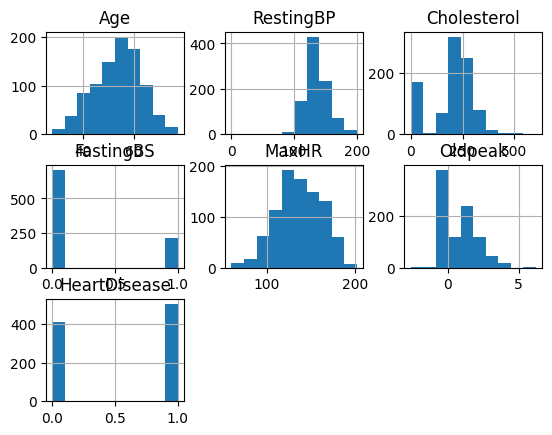

In [74]:
dataset.hist()
plt.show()

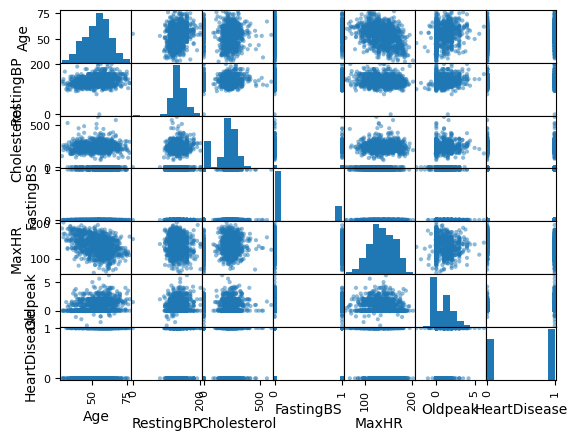

In [75]:
pd.plotting.scatter_matrix(dataset)
plt.show()


<Axes: xlabel='HeartDisease', ylabel='Age'>

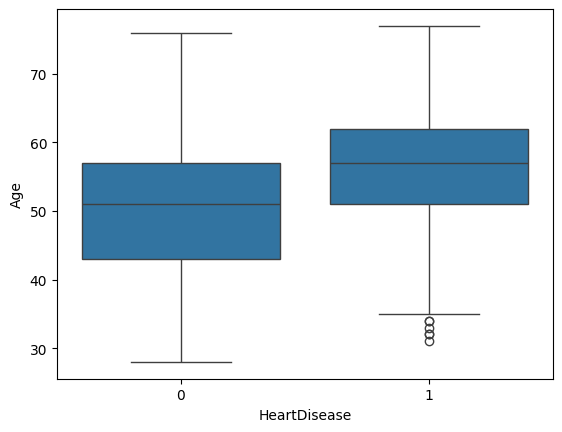

In [76]:
import seaborn as sns

sns.boxplot(x="HeartDisease", y="Age", data=dataset)
#Spacientes com doença tendem a ter idade maior


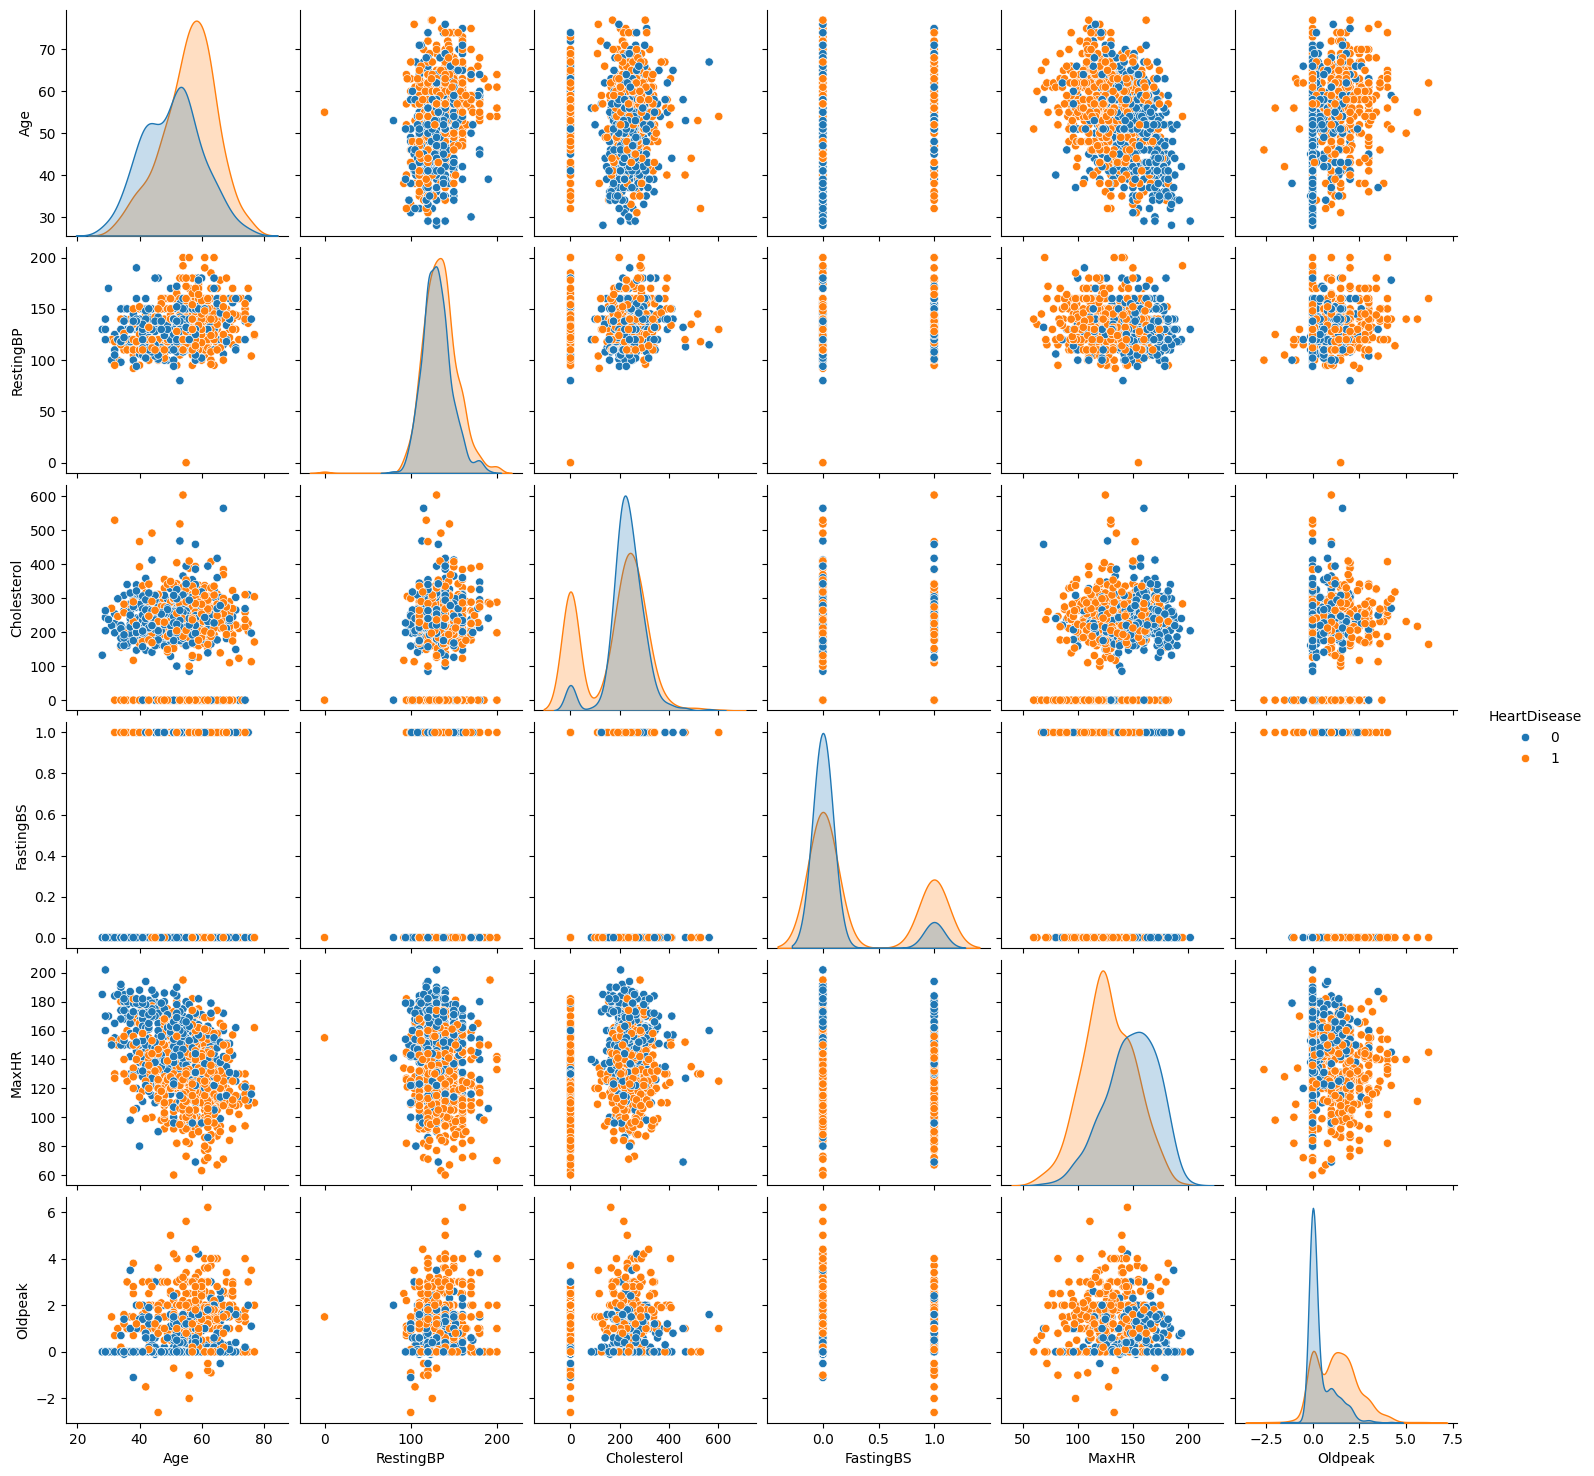

In [77]:
sns.pairplot(dataset, hue="HeartDisease")
# sns.pairplot(dataset, hue="HeartDisease") # para verificar correlações entre as variáveis


<Axes: xlabel='Sex', ylabel='count'>

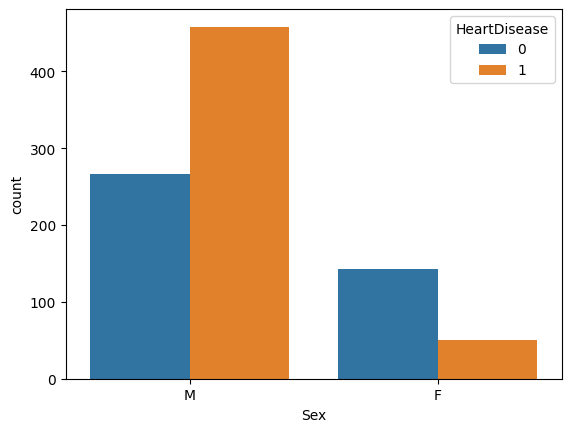

In [78]:
sns.countplot(x="Sex", hue="HeartDisease", data=dataset)
#homens apresentam mais casos de doença

In [79]:
#limpeza dos dados
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
selector.fit(dataset.select_dtypes(include=['float64', 'int64']))


,threshold,0.01


# 2 - Divisão dos dados

Criando dois conjuntos de dados para serem utilizados nas etapas seguintes, treinamento e avaliação.

<div>
<br/>
<img src="https://github.com/rafaelmm82/ufpb-ia-20201/raw/master/02-fundamentos_de_ia/02_aula_pratica_classificacao_iris/03_divisao_dados.jpg", width="640"/>
</div>

In [4]:

# carregando uma função pertencente ao scikit-learn para realizar
# automaticamente uma amostragem sem reposição aleatória e dividir
# os dados em dois conjuntos
from sklearn.model_selection import train_test_split

# importante lembrar que as 4 primeiras colunas são o nosso 'X'
# ou seja, os dados de entrada do modelo, e que a última coluna
# é o nosso 'y', ou seja, o dado que o modelo deve aprender a predizer
print('exemplo de entrada (x):\n', dataset.iloc[4, :8])
print('exemplo de saída (y):\n', dataset.iloc[4, 8])

exemplo de entrada (x):
 Age                  54
Sex                   M
ChestPainType       NAP
RestingBP           150
Cholesterol         195
FastingBS             0
RestingECG       Normal
MaxHR               122
Name: 4, dtype: object
exemplo de saída (y):
 N


In [80]:

from sklearn.preprocessing import LabelEncoder
# criando os dados de entrada e saída para treinamento e validação
# usando o método 'values' ele retorna um array bidimensional
# para serem inseridos na função train_test_split
array = dataset.values
print(type(array))

dataset_encoded = pd.get_dummies(dataset)

#Vamos avaliar e treinar a partir da coluna HeartDisease
#Queremos prever se o paciente tem ou não doença cardíaca
X = dataset_encoded.drop("HeartDisease", axis=1).values
y = dataset_encoded["HeartDisease"].values
le = LabelEncoder()

print("dimensoes de X", X.shape)
print("dimensoes de y", y.shape)

<class 'numpy.ndarray'>
dimensoes de X (918, 20)
dimensoes de y (918,)


In [6]:

# utilizando um critério de divisão percentual 20% na função train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# olhando alguns dados referentes aos conjuntos
print(f'\n dimensao de X_train {X_train.shape} e y_train {y_train.shape}')
print(f'\n dimensao de X_test {X_test.shape} e y_train {y_test.shape}')


 dimensao de X_train (734, 20) e y_train (734,)

 dimensao de X_test (184, 20) e y_train (184,)


# 3 - Treinamento do Modelo

Definindo um modelo e realizando o treinamento

<div>
<img src="https://github.com/rafaelmm82/ufpb-ia-20201/raw/master/02-fundamentos_de_ia/02_aula_pratica_classificacao_iris/04_treinamento_modelo.jpg", width="640"/>
</div>

In [7]:
# carregando a classe pra criar um modelo do scikit-learn
from sklearn.svm import SVC

# instanciando um objeto do modelo SVC com parâmetros padrões
model = SVC(gamma='auto')


In [8]:
model.fit(X_train, y_train)  # treinando o modelo com os dados de entrada e saída

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'auto'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [9]:
# executa o método, a partir de um de treinamento 'fit', para ajustar os parâmetros
# do modelo algoritmo de aprendizagem, em função
# dos valores contidos no conjunto de dados
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# realizando as predições utilizando o conjunto de testes
prediction = model.predict(X_test)


In [10]:
model.fit(X_train, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'auto'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


# 4 - Avaliação do Modelo

Utilizando o conjunto de dados de teste define-se uma métrica estatística de
avaliação e deduz-se a qualidade do resultado do treinamento

<div>
<br/>
<img src="https://github.com/rafaelmm82/ufpb-ia-20201/raw/master/02-fundamentos_de_ia/02_aula_pratica_classificacao_iris/05_avaliacao_modelo.jpg", width="640"/>
<div/>

In [11]:
# carregando funções da biblioteca scikit-learn que auxiliam no cálculo
# das avaliações dos modelos
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# realizando as predições utilizando o conjunto de testes
prediction = model.predict(X_test)


In [12]:
# para efeitos de comparação e devido ao fato do conjunto ser pequeno
# podemos observar visualmente o resultdo da predição e o valor real do dataset
print("Valores preditos:\n", prediction)
print("Valores esperado:\n", y_test)
print("Comparativo:\n", y_test == prediction)


Valores preditos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]
Valores esperado:
 [1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1
 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1
 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1]
Comparativo:
 [ True  True  True  True  True False  True False False False False  True
  True  True  True  True False False  True  True  True  True  True  True
  True  True  True  True  True False False False False

In [13]:
# usando funções e métricas mais robustas para avaliar o desempenho
# exibindo a acurácia do modelo para este treinamento
print("Acurácio do modelo:\n", accuracy_score(y_test, prediction))

#o modelo obteve uma acurácia de 0.63, ou seja, 63% de acerto

Acurácio do modelo:
 0.6304347826086957


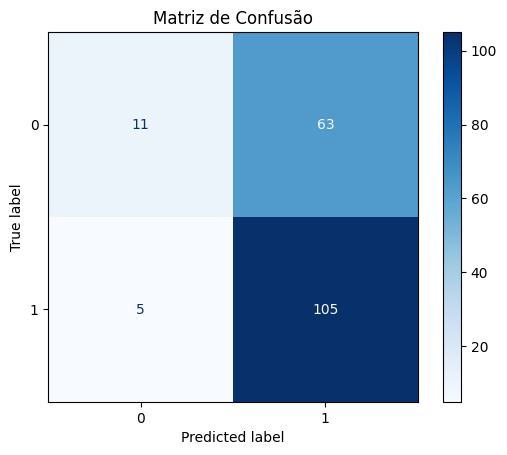

In [14]:
# exibindo a matrix confusão VP, FP, VN FN
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calcula a matriz de confusão
cm = confusion_matrix(y_test, prediction)

# Exibe a matriz com rótulos automáticos
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

# Personaliza o gráfico
plt.title('Matriz de Confusão')
plt.show()


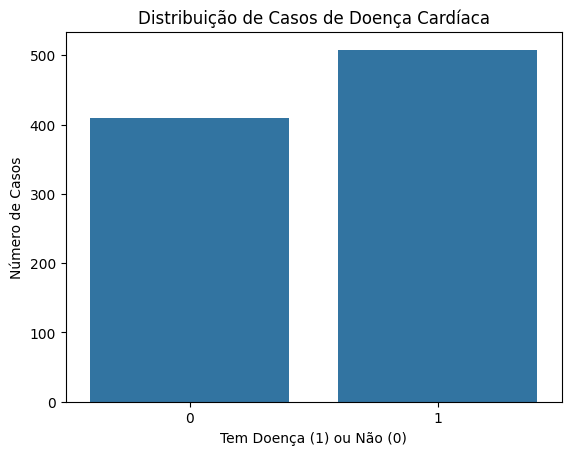

In [16]:
import seaborn as sns

sns.countplot(x='HeartDisease', data=dataset)
plt.title("Distribuição de Casos de Doença Cardíaca")
plt.xlabel("Tem Doença (1) ou Não (0)")
plt.ylabel("Número de Casos")
plt.show()


## Após obter estes resultados, podemos considerar que uma acurancia de 63% é razoável para um modelo inicial, mas ainda há espaço para melhorias. Podemos explorar outras técnicas de pré-processamento, ajustar hiperparâmetros do modelo ou até mesmo experimentar outros algoritmos de aprendizado de máquina para tentar aumentar essa acurácia. Além disso, a análise da matriz de confusão nos ajuda a entender melhor onde o modelo está errando, permitindo ajustes mais direcionados.
Para melhorar o modelo, podemos consideraras seguintes abordagens:
1. **Converção de colunas em numeros**
2. **Uso de outros modelos de aprendizagem** 

In [18]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Copia do dataset
df = dataset.copy()

# Codificando variáveis categóricas
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Separando variáveis dependente e independentes
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Normalizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Treinando novanente com o modelo SVC

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = SVC(gamma='auto')
model.fit(X_train, y_train)

prediction = model.predict(X_test)
acc = accuracy_score(y_test, prediction)
print("Acurácia com Random Forest:", acc)


Acurácia com Random Forest: 0.8641304347826086


In [22]:
print("Valores preditos:\n", prediction)
print("Valores esperado:\n", y_test)
print("Comparativo:\n", y_test == prediction)

Valores preditos:
 [0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1
 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1
 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1
 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0
 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1]
Valores esperado:
 668    0
30     1
377    1
535    1
807    0
      ..
211    1
745    1
584    1
878    0
451    1
Name: HeartDisease, Length: 184, dtype: int64
Comparativo:
 668     True
30      True
377     True
535     True
807     True
       ...  
211    False
745     True
584     True
878     True
451     True
Name: HeartDisease, Length: 184, dtype: bool


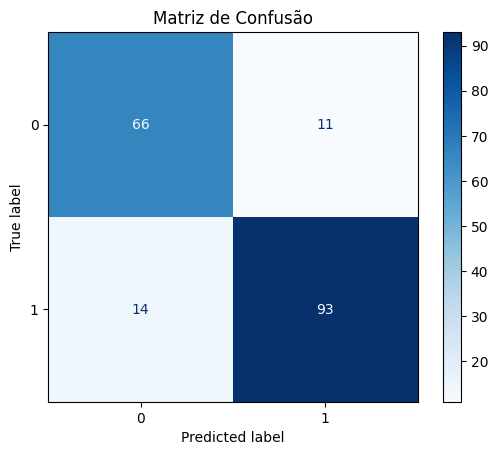

In [27]:
cm = confusion_matrix(y_test, prediction)

# Exibe a matriz com rótulos automáticos
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

# Personaliza o gráfico
plt.title('Matriz de Confusão')
plt.show()


In [29]:
print('relatorio completo', classification_report(y_test, prediction))

relatorio completo               precision    recall  f1-score   support

           0       0.82      0.86      0.84        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



## Treinamento no Modelo KNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

prediction = model.predict(X_test)
acc = accuracy_score(y_test, prediction)
print("Acurácia com Random Forest:", acc)


Acurácia com Random Forest: 0.8369565217391305


In [90]:
# Exemplo de predição com o modelo KNN
# O modelo espera 11 features de entrada, como em X_scaled ou X_test
# Aqui usamos o primeiro exemplo do conjunto de teste
print(model.predict([X_test[0]]))

[0]


In [91]:
print('Relatorio completo', classification_report(y_test, prediction))

Relatorio completo               precision    recall  f1-score   support

           0       0.76      0.88      0.82        77
           1       0.91      0.80      0.85       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



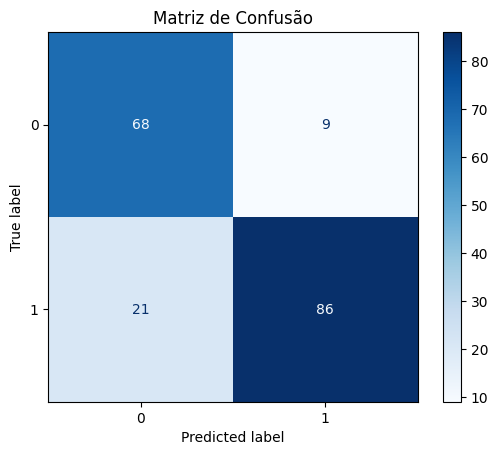

In [92]:
# Calcula a matriz de confusão
cm = confusion_matrix(y_test, prediction)

# Exibe a matriz com rótulos automáticos
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

# Personaliza o gráfico
plt.title('Matriz de Confusão')
plt.show()

## DecisionTreeClassifier 

In [83]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [84]:
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [85]:
prediction = clf.predict(X_test)
acc = accuracy_score(y_test, prediction)
print("Acurácia:", acc)

Acurácia: 0.7934782608695652


In [86]:
print('relatorio completo', classification_report(y_test, prediction))

relatorio completo               precision    recall  f1-score   support

           0       0.71      0.84      0.77        77
           1       0.87      0.76      0.81       107

    accuracy                           0.79       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.81      0.79      0.79       184



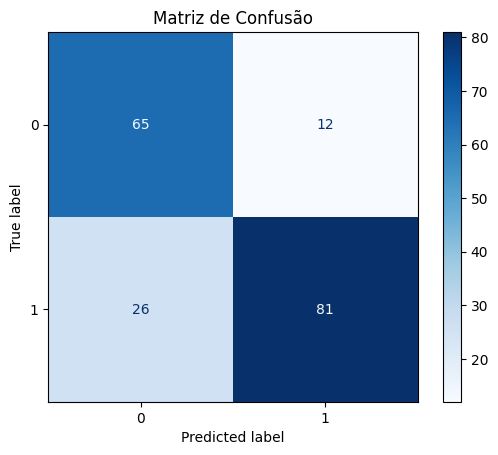

In [87]:
# Calcula a matriz de confusão
cm = confusion_matrix(y_test, prediction)

# Exibe a matriz com rótulos automáticos
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

# Personaliza o gráfico
plt.title('Matriz de Confusão')
plt.show()

## Treinamento utilizando o modelo RandomForestClassifier a fim de obter um melhor resultado com o modelo.

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

prediction = model.predict(X_test)
acc = accuracy_score(y_test, prediction)
print("Acurácia com Random Forest:", acc)


Acurácia com Random Forest: 0.8804347826086957


In [31]:
print("Valores preditos:\n", prediction)
print("Valores esperado:\n", y_test)
print("Comparativo:\n", y_test == prediction)

Valores preditos:
 [0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1
 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1
 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1
 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0
 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1]
Valores esperado:
 668    0
30     1
377    1
535    1
807    0
      ..
211    1
745    1
584    1
878    0
451    1
Name: HeartDisease, Length: 184, dtype: int64
Comparativo:
 668    True
30     True
377    True
535    True
807    True
       ... 
211    True
745    True
584    True
878    True
451    True
Name: HeartDisease, Length: 184, dtype: bool


In [44]:
print('relatorio completo', classification_report(y_test, prediction))

relatorio completo               precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.90      0.90      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



## Visualização da matriz de confusão

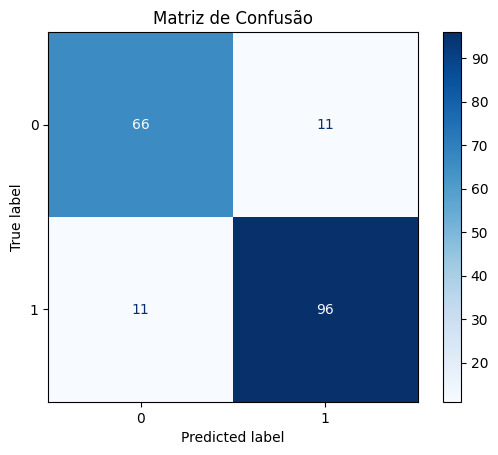

In [20]:
# Calcula a matriz de confusão
cm = confusion_matrix(y_test, prediction)

# Exibe a matriz com rótulos automáticos
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

# Personaliza o gráfico
plt.title('Matriz de Confusão')
plt.show()

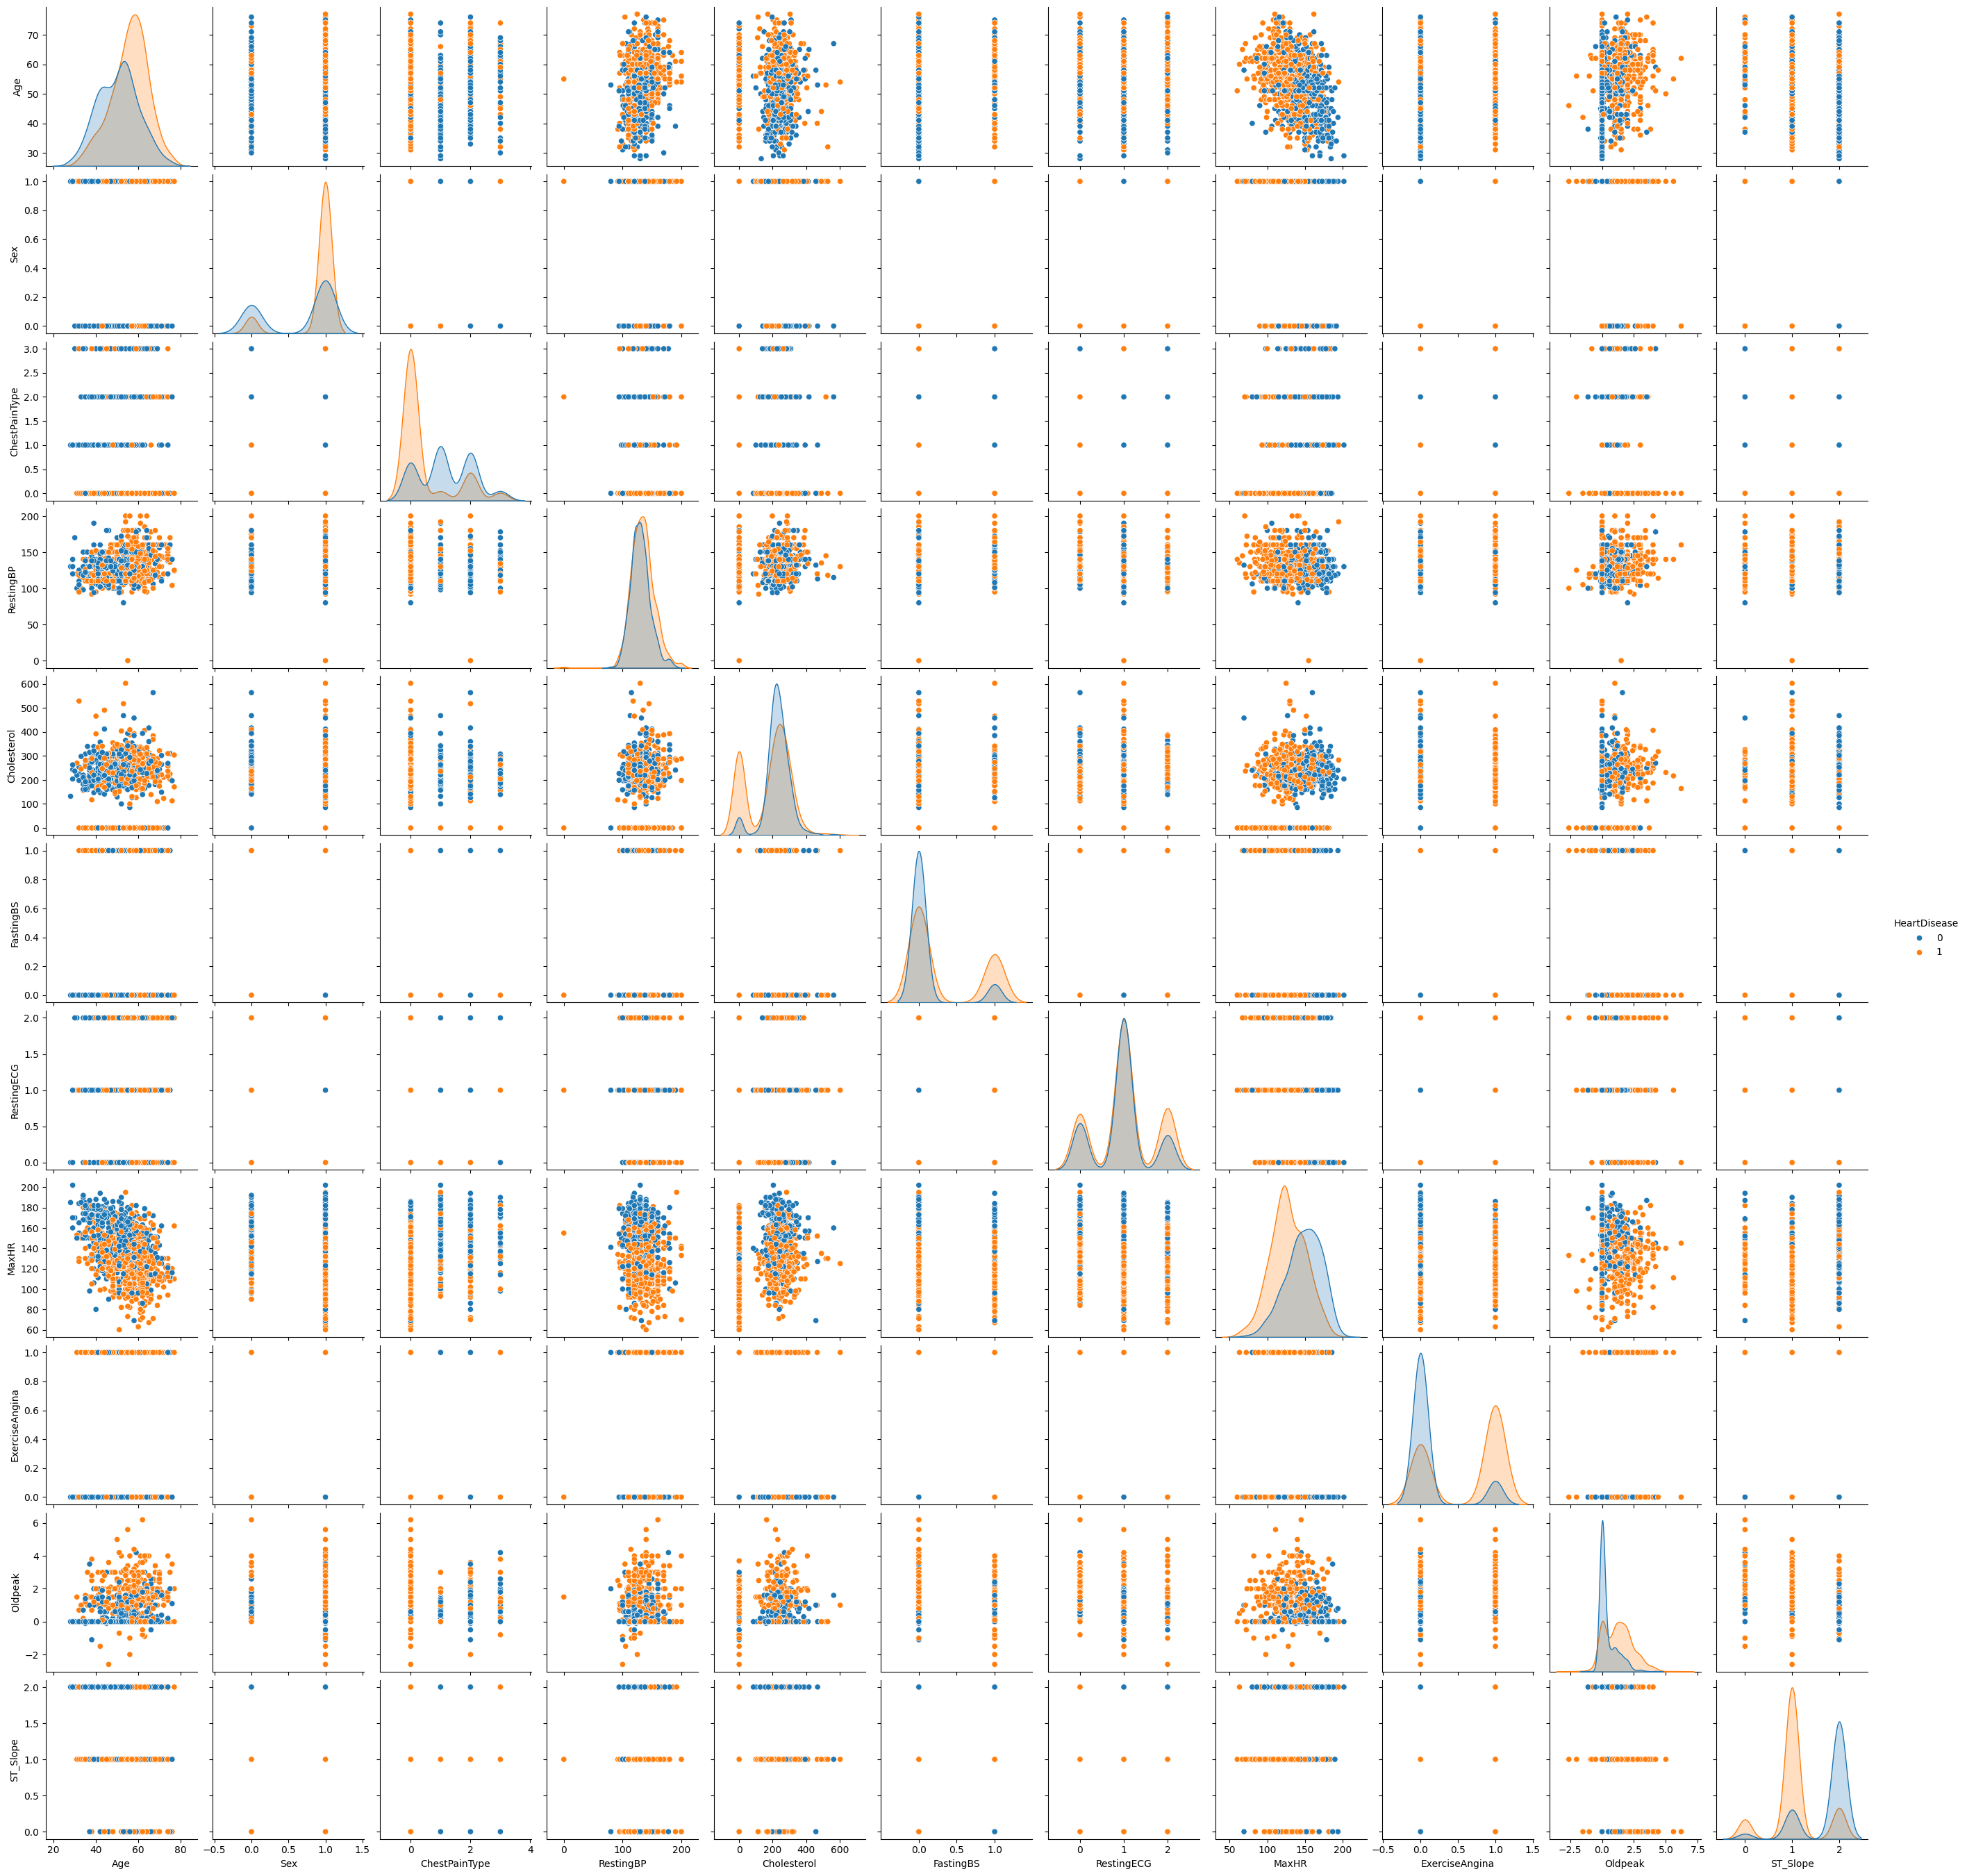

In [20]:
sns.pairplot(df, hue="HeartDisease")
